In [4]:
!pip install pillow # for PIL, image processing/generation 
!pip install rdkit #for chemical structures reading/analysis
!pip install rlextra -i https://www.reportlab.com/pypi/




[notice] A new release of pip is available: 25.2 -> 26.0.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 25.2 -> 26.0.1
[notice] To update, run: pip install --upgrade pip
Looking in indexes: https://www.reportlab.com/pypi/
User for www.reportlab.com: ^C

[notice] A new release of pip is available: 25.2 -> 26.0.1
[notice] To update, run: pip install --upgrade pip
ERROR: Operation cancelled by user


In [76]:
!pip install reportlab

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 11.0 MB/s  0:00:00 eta 0:00:01

[notice] A new release of pip is available: 25.2 -> 26.0.1
[notice] To update, run: pip install --upgrade pip


In [92]:
from __future__ import annotations
from typing import Dict, List, Optional, Tuple

import io
from PIL import Image

import rdkit
from rdkit import Chem
from rdkit.Chem import Draw, Descriptors, Crippen
from rdkit.Chem import Draw
from rdkit.Chem.Draw import rdMolDraw2D




In [93]:
def get_number_of_atoms(mol: rdkit.Chem.rdchem.Mol) -> Optional[int]: 
    return mol.GetNumAtoms()

In [94]:
def pick_label(mol: rdkit.Chem.rdchem.Mol, label_prop: Optional[str] | None, fallback_index: Optional[int]) -> Optional[str]:
    if label_prop and mol.HasProp(label_prop):
        v = mol.GetProp(label_prop).strip()
        if v:
            return v
    # RDKit stores SDF title line in _Name
    if mol.HasProp("_Name"):
        v = mol.GetProp("_Name").strip()
        if v:
            return v
    # common-ish names
    for k in ("ID", "Name", "MolID", "Compound_ID", "CompoundID", "title"):
        if mol.HasProp(k):
            v = mol.GetProp(k).strip()
            if v:
                return v
    return f"#{fallback_index}"


def calc_builtin_props(mol: rdkit.Chem.rdchem.Moll) -> Dict[str, str]:
    # Safe defaults; ignore failures quietly
    out = {}
    try:
        out["MW"] = f"{Descriptors.MolWt(mol):.2f}"
    except Exception:
        pass
    try:
        out["logP"] = f"{Crippen.MolLogP(mol):.2f}"
    except Exception:
        pass
    return out


def get_prop_string(mol: rdkit.Chem.rdchem.Mol, props: List[str]) -> Optional[str]:
    """
    props can be:

SDF property names
MW, logP (computed)
    """
    built = calc_builtin_props(mol)
    parts = []
    for p in props:
        p = p.strip()
        if not p:
            continue
        if p in built:
            parts.append(f"{p}={built[p]}")
        elif mol.HasProp(p):
            v = mol.GetProp(p).strip().replace("\n", " ")
            if v:
                parts.append(f"{p}={v}")
    return "  ".join(parts)

In [95]:
INPUT_SDF = "../Structures of compounds_Xiaoyi_2026.02.12/3.5 WuXi OTS Library_Solid Stock_2685cpds_Molecule Glue Lib_260119.sdf"
OUTPUT_SDF = "./test.sdf"
SUPPL = Chem.SDMolSupplier(INPUT_SDF, removeHs=False)
MOLS = [m for m in SUPPL if m is not None]


In [65]:
print(f'[INFO] Number of molecules in {INPUT_SDF}:\n {len(MOLS)}')

[INFO] Number of molecules in ../Structures of compounds_Xiaoyi_2026.02.12/3.5 WuXi OTS Library_Solid Stock_2685cpds_Molecule Glue Lib_260119.sdf:
 2685


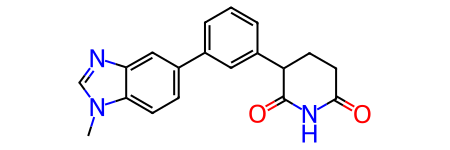

In [66]:
MOLS[0] # https://www.rdkit.org/docs/source/rdkit.Chem.rdchem.html#rdkit.Chem.rdchem.Mol.GetAromaticAtoms

In [38]:
#for mol in MOLS:
#    print(get_number_of_atoms(mol))

In [67]:
type(MOLS[0])

rdkit.Chem.rdchem.Mol

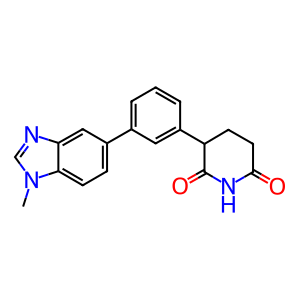

In [74]:
Draw.MolToImage(MOLS[0])

In [69]:
MOLS[0].GetNumAtoms()

24

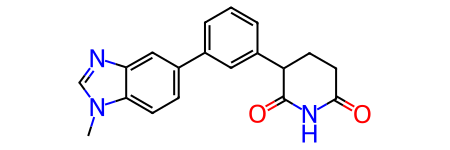

In [47]:
MOLS[0]

In [48]:
MOLS[0].GetProp("_Name")

''

In [52]:
D = rdMolDraw2D.MolDraw2DCairo(250, 200)
D.drawOptions().addStereoAnnotation = True
D.drawOptions().addAtomIndices = True
D.DrawMolecule(MOLS[0])
D.FinishDrawing()

In [70]:
pick_label(MOLS[0], "CompoundID", 1)

'WXMG_A06B334'

In [71]:
calc_builtin_props(MOLS[0])

{'MW': '319.36', 'logP': '2.76'}

In [72]:
get_prop_string(MOLS[0], ["MW","logP"])

'MW=319.36  logP=2.76'

In [81]:
from rdkit_sdf_reporter import SDFStructureReporter

INPUT_PATH = "../Structures of compounds_Xiaoyi_2026.02.12"
reporter = SDFStructureReporter(
    input_path=INPUT_PATH,
    label_prop=None,  # or e.g. "Compound_ID"
    props=["MW", "logP", "HBD", "HBA", "TPSA", "RB", "Rings", "HeavyAtoms"],
    sanitize=True,
)

reporter.print_file_molecule_counts()
print(reporter.summarize())

[INFO] Number of molecules in ../Structures of compounds_Xiaoyi_2026.02.12/3.5 WuXi OTS Library_Solid Stock_2685cpds_Molecule Glue Lib_260119.sdf: 2685
[INFO] Number of molecules in ../Structures of compounds_Xiaoyi_2026.02.12/3.6 WuXi OTS Library_Solid Stock_4518cpds_covalent_260119.sdf: 4518


[13:07:13] Warning: ambiguous stereochemistry - overlapping neighbors  - at atom 4 ignored
[13:07:14] Warning: ambiguous stereochemistry - overlapping neighbors  - at atom 7 ignored
[13:07:14] Warning: ambiguous stereochemistry - overlapping neighbors  - at atom 1 ignored
[13:07:14] Warning: ambiguous stereochemistry - overlapping neighbors  - at atom 7 ignored
[13:07:14] Warning: ambiguous stereochemistry - overlapping neighbors  - at atom 1 ignored
[13:07:14] Warning: ambiguous stereochemistry - overlapping neighbors  - at atom 4 ignored
[13:07:14] Warning: ambiguous stereochemistry - overlapping neighbors  - at atom 0 ignored
[13:07:15] Warning: ambiguous stereochemistry - overlapping neighbors  - at atom 0 ignored
[13:07:16] Warning: ambiguous stereochemistry - overlapping neighbors  - at atom 3 ignored
[13:07:16] Warning: ambiguous stereochemistry - overlapping neighbors  - at atom 6 ignored
[13:07:18] Warning: ambiguous stereochemistry - overlapping neighbors  - at atom 6 ignored

[INFO] Number of molecules in ../Structures of compounds_Xiaoyi_2026.02.12/WuXi OTS Library_Solid Stock_135989cpds_260119.sdf: 135989


[13:07:47] Warning: ambiguous stereochemistry - overlapping neighbors  - at atom 4 ignored
[13:07:47] Warning: ambiguous stereochemistry - overlapping neighbors  - at atom 7 ignored
[13:07:47] Warning: ambiguous stereochemistry - overlapping neighbors  - at atom 4 ignored
[13:07:47] Warning: ambiguous stereochemistry - overlapping neighbors  - at atom 6 ignored
[13:07:48] Warning: ambiguous stereochemistry - overlapping neighbors  - at atom 1 ignored


[INFO] Number of molecules in ../Structures of compounds_Xiaoyi_2026.02.12/WuXi OTS Library_Solution Stock_137831cpds_260119.sdf: 137831


[13:08:12] Warning: ambiguous stereochemistry - overlapping neighbors  - at atom 4 ignored
[13:08:12] Warning: ambiguous stereochemistry - overlapping neighbors  - at atom 7 ignored
[13:08:12] Warning: ambiguous stereochemistry - overlapping neighbors  - at atom 1 ignored
[13:08:12] Warning: ambiguous stereochemistry - overlapping neighbors  - at atom 7 ignored
[13:08:12] Warning: ambiguous stereochemistry - overlapping neighbors  - at atom 1 ignored
[13:08:13] Warning: ambiguous stereochemistry - overlapping neighbors  - at atom 4 ignored
[13:08:13] Warning: ambiguous stereochemistry - overlapping neighbors  - at atom 0 ignored
[13:08:14] Warning: ambiguous stereochemistry - overlapping neighbors  - at atom 0 ignored
[13:08:15] Warning: ambiguous stereochemistry - overlapping neighbors  - at atom 3 ignored
[13:08:15] Warning: ambiguous stereochemistry - overlapping neighbors  - at atom 6 ignored
[13:08:17] Warning: ambiguous stereochemistry - overlapping neighbors  - at atom 6 ignored

{'files': 4, 'molecules_total': 281023}


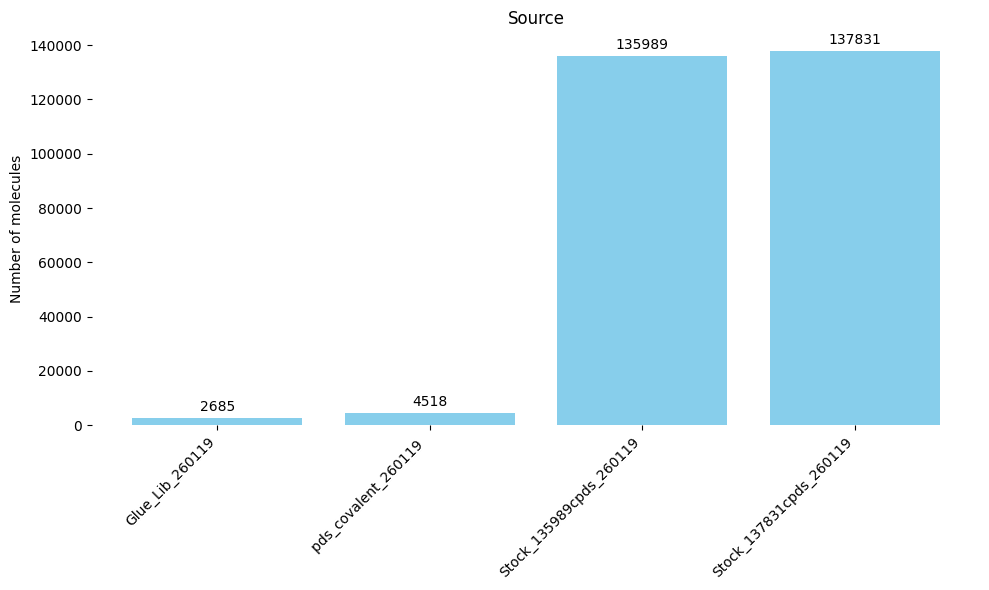

In [112]:
import matplotlib.pyplot as  plt
import numpy as np
import math
DATA = {
    'Glue_Lib_260119' : 2685,
    'pds_covalent_260119 ' : 4518,
    'Stock_135989cpds_260119' : 135989,
    'Stock_137831cpds_260119' : 137831
    
}

plt.figure(figsize=(10, 6))
bars = plt.bar(DATA.keys(), DATA.values(), color='skyblue')
plt.bar_label(bars, padding=3) 
plt.ylabel('Number of molecules')
plt.title('Source')
plt.box(False)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()




In [82]:
tsv_path = reporter.write_tsv("out/structures_report.tsv")
print("TSV:", tsv_path)

[13:10:45] Warning: ambiguous stereochemistry - overlapping neighbors  - at atom 4 ignored
[13:10:46] Warning: ambiguous stereochemistry - overlapping neighbors  - at atom 7 ignored
[13:10:46] Warning: ambiguous stereochemistry - overlapping neighbors  - at atom 1 ignored
[13:10:47] Warning: ambiguous stereochemistry - overlapping neighbors  - at atom 7 ignored
[13:10:47] Warning: ambiguous stereochemistry - overlapping neighbors  - at atom 1 ignored
[13:10:48] Warning: ambiguous stereochemistry - overlapping neighbors  - at atom 4 ignored
[13:10:50] Warning: ambiguous stereochemistry - overlapping neighbors  - at atom 0 ignored
[13:10:53] Warning: ambiguous stereochemistry - overlapping neighbors  - at atom 0 ignored
[13:10:59] Warning: ambiguous stereochemistry - overlapping neighbors  - at atom 3 ignored
[13:10:59] Warning: ambiguous stereochemistry - overlapping neighbors  - at atom 6 ignored
[13:11:08] Warning: ambiguous stereochemistry - overlapping neighbors  - at atom 6 ignored

TSV: out/structures_report.tsv


In [104]:
from pathlib import Path
from importlib import reload
import rdkit_sdf_reporter
reload(rdkit_sdf_reporter)
from rdkit_sdf_reporter import SDFStructureReporter

INPUT_PATH = Path("../Structures of compounds_Xiaoyi_2026.02.12")
OUT_DIR = Path("out/pdfs")
OUT_DIR.mkdir(parents=True, exist_ok=True)

reporter = SDFStructureReporter(INPUT_PATH)

for sdf in reporter.iter_sdf_files():
    r = SDFStructureReporter(sdf, label_prop=reporter.label_prop, props=reporter.props, sanitize=reporter.sanitize)
    out_pdf = OUT_DIR / f"{sdf.stem}.pdf"
    r.write_pdf(out_pdf)
    print("Wrote:", out_pdf)

Wrote: out/pdfs/3.5 WuXi OTS Library_Solid Stock_2685cpds_Molecule Glue Lib_260119.pdf
Wrote: out/pdfs/3.6 WuXi OTS Library_Solid Stock_4518cpds_covalent_260119.pdf


[20:49:12] Warning: ambiguous stereochemistry - overlapping neighbors  - at atom 4 ignored
[20:49:19] Warning: ambiguous stereochemistry - overlapping neighbors  - at atom 7 ignored
[20:49:19] Warning: ambiguous stereochemistry - overlapping neighbors  - at atom 1 ignored
[20:49:27] Warning: ambiguous stereochemistry - overlapping neighbors  - at atom 7 ignored
[20:49:27] Warning: ambiguous stereochemistry - overlapping neighbors  - at atom 1 ignored
[20:49:32] Warning: ambiguous stereochemistry - overlapping neighbors  - at atom 4 ignored
[20:49:41] Warning: ambiguous stereochemistry - overlapping neighbors  - at atom 0 ignored
[20:49:57] Warning: ambiguous stereochemistry - overlapping neighbors  - at atom 0 ignored
[20:50:28] Warning: ambiguous stereochemistry - overlapping neighbors  - at atom 3 ignored
[20:50:28] Warning: ambiguous stereochemistry - overlapping neighbors  - at atom 6 ignored
[20:51:12] Warning: ambiguous stereochemistry - overlapping neighbors  - at atom 6 ignored

Wrote: out/pdfs/WuXi OTS Library_Solid Stock_135989cpds_260119.pdf


[21:05:03] Warning: ambiguous stereochemistry - overlapping neighbors  - at atom 4 ignored
[21:05:03] Warning: ambiguous stereochemistry - overlapping neighbors  - at atom 7 ignored
[21:05:03] Warning: ambiguous stereochemistry - overlapping neighbors  - at atom 4 ignored
[21:05:03] Warning: ambiguous stereochemistry - overlapping neighbors  - at atom 6 ignored
[21:05:03] Warning: ambiguous stereochemistry - overlapping neighbors  - at atom 1 ignored


Wrote: out/pdfs/WuXi OTS Library_Solution Stock_137831cpds_260119.pdf


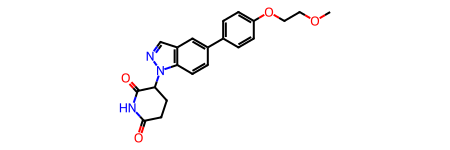

In [103]:
MOLS[7] 

In [113]:
!head "out/structures_report.tsv"

SMILES	Label	File	Index	NumAtoms	MW	logP	HBD	HBA	TPSA	RB	Rings	HeavyAtoms
Cn1cnc2cc(-c3cccc(C4CCC(=O)NC4=O)c3)ccc21	WXMG_A06B334	3.5 WuXi OTS Library_Solid Stock_2685cpds_Molecule Glue Lib_260119.sdf	1	24	319.36	2.76	1	4	63.99	2	4	24
O=C1CCC(n2ncc3cc(-c4cncc(F)c4)ccc32)C(=O)N1	WXMG_A10B019	3.5 WuXi OTS Library_Solid Stock_2685cpds_Molecule Glue Lib_260119.sdf	2	24	324.32	2.22	1	5	76.88	2	4	24
Cc1ccc(C(=O)NCc2cccc3cn(C)nc23)cc1N1CCC(=O)NC1=O	WXMG_A22C436	3.5 WuXi OTS Library_Solid Stock_2685cpds_Molecule Glue Lib_260119.sdf	3	29	391.43	2.26	2	5	96.33	4	4	29
CC(C)CNC(=O)c1ccc(-c2cc3c(cc2F)c(N2CCC(=O)NC2=O)nn3C)cc1	WXMG_A12B036	3.5 WuXi OTS Library_Solid Stock_2685cpds_Molecule Glue Lib_260119.sdf	4	32	437.48	3.21	2	5	96.33	5	4	32
CCOc1ccc(F)c(-c2ccc(N3CCC(=O)NC3=O)c3c2cnn3C)c1Cl	WXMG_A24B116	3.5 WuXi OTS Library_Solid Stock_2685cpds_Molecule Glue Lib_260119.sdf	5	29	416.84	3.88	1	5	76.46	4	4	29
Cn1c(=O)n(C2CCC(=O)NC2=O)c2cccc(NCC3(F)CCCN(C(=O)OC(C)(C)C)C3)c21	WXMG_A02C053	3.5 WuXi OTS Li

UniqueSmilesSummary(total_rows=281023, unique_smiles=169921, duplicate_rows=111102)
Unique TSV: out/structures_report.unique.tsv


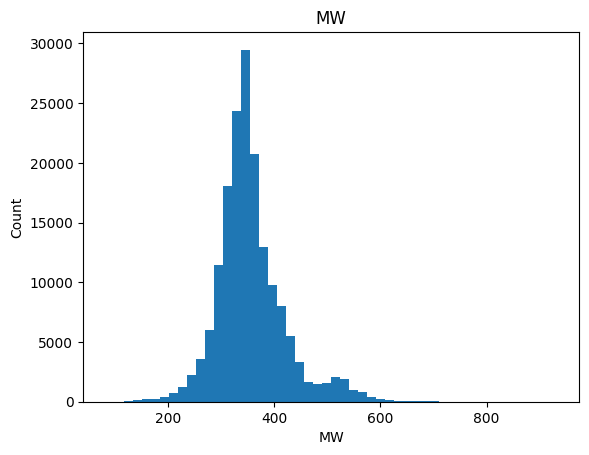

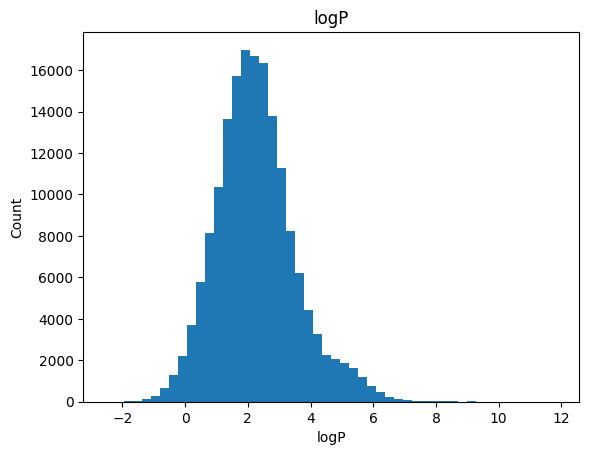

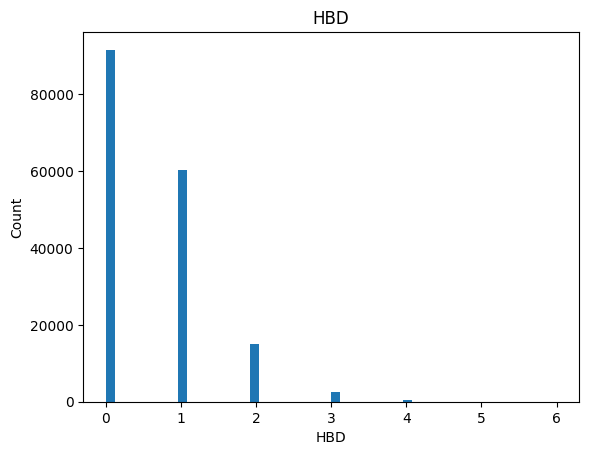

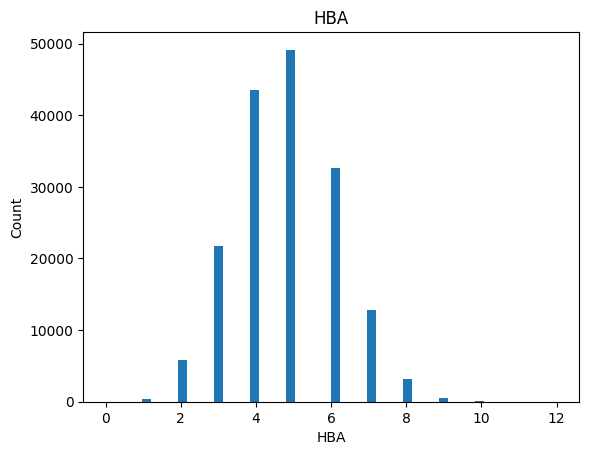

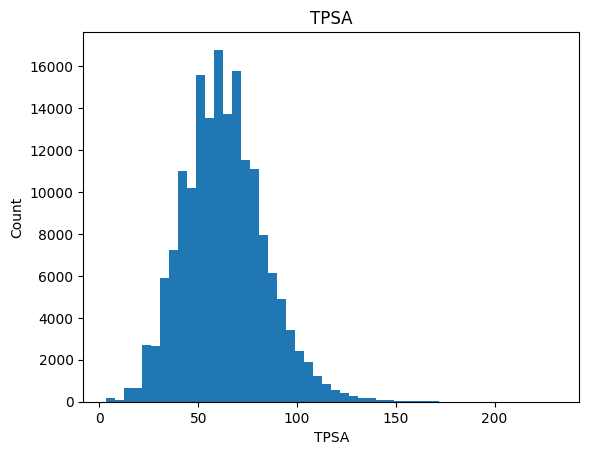

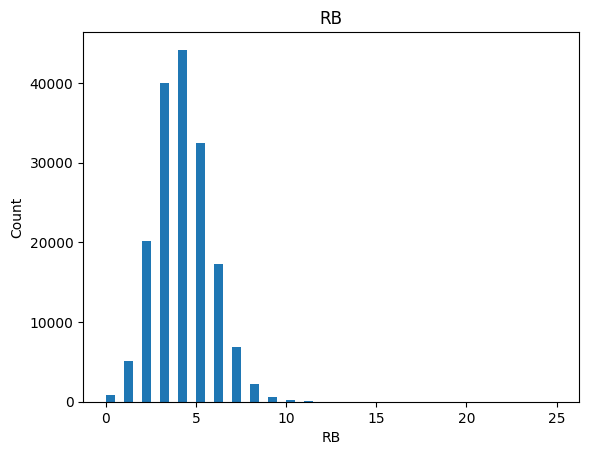

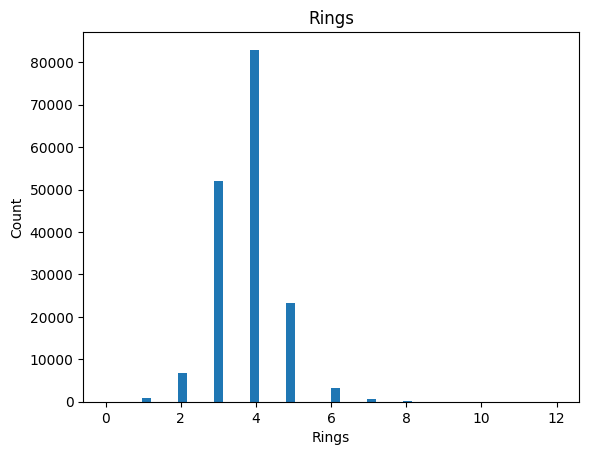

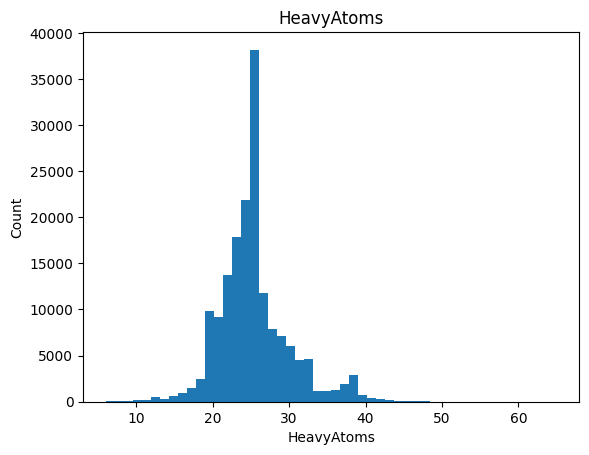

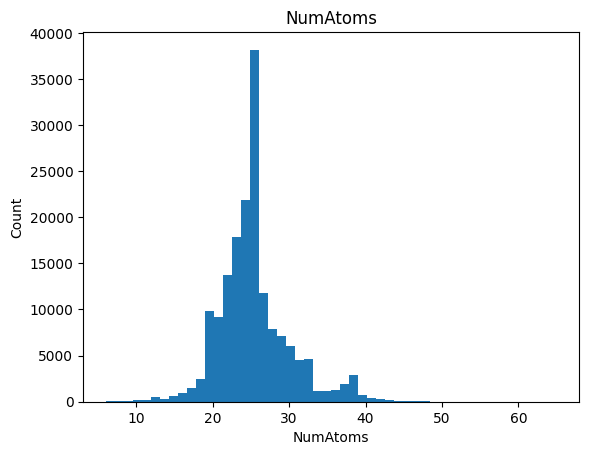

[PosixPath('out/plots/MW.png'),
 PosixPath('out/plots/logP.png'),
 PosixPath('out/plots/HBD.png'),
 PosixPath('out/plots/HBA.png'),
 PosixPath('out/plots/TPSA.png'),
 PosixPath('out/plots/RB.png'),
 PosixPath('out/plots/Rings.png'),
 PosixPath('out/plots/HeavyAtoms.png'),
 PosixPath('out/plots/NumAtoms.png')]

In [123]:

reload(plot_tsv)
from plot_tsv import SDFTSVAnalyzer

tsv = "out/structures_report.tsv"
a = SDFTSVAnalyzer(tsv)
a.unique_smiles_summary()
summary = a.unique_smiles_summary()
print(summary)

unique_tsv = a.write_unique_tsv("out/structures_report.unique.tsv")
print("Unique TSV:", unique_tsv)

a.plot_numeric_distributions(
    columns=["MW", "logP", "HBD", "HBA", "TPSA", "RB", "Rings", "HeavyAtoms", "NumAtoms"],
    bins=50,
    use_unique=True,
    out_dir="out/plots",
    show=True,
)

In [133]:
# Splitting rules
#
# Input:
#   - A TSV that is already SMILES-unique (one row per unique SMILES)
#   - We do NOT modify the input file; we only write new TSVs to output_dir.
#
# We classify each molecule by scanning ALL nitrogen atoms (atomic number 7)
# which is the number of protons in its nucleus!!! 
# A molecule goes into EXACTLY ONE bucket, using this priority:
#   1) aromatic_amines.tsv
#   2) primary_aliphatic_amines.tsv
#   3) secondary_aliphatic_amines.tsv
#   4) others.tsv
#
# -------------------------------------------------------------------------
# Step A: define what counts as an "amine nitrogen" (candidate N)
# -------------------------------------------------------------------------
# We only consider an N atom as an "amine N" if ALL are true:
#   - N is NOT aromatic itself (atom.GetIsAromatic() == False)
#   - N is NOT a nitrile nitrogen (i.e., involved in a triple bond to carbon: C#N)
#   - N is NOT amide-like / sulfonamide-like (we exclude resonance-stabilized N):
#       * N is NOT single-bonded to a carbonyl carbon:
#           N - C where that C has a double bond to O or S (C=O or C=S)
#         This excludes amides, ureas, carbamates, lactams, etc.
#       * N is NOT single-bonded to a sulfonyl sulfur:
#           N - S where that S has one or more S=O double bonds
#         This excludes sulfonamides / sulfonyl ureas, etc.
#   - N has at least one hydrogen (TotalHs > 0)
#     (so tertiary amines (R3N) and quaternary ammonium (R4N+) are NOT counted
#      for primary/secondary classification in this workflow)
#
# -------------------------------------------------------------------------
# Step B: identify aromatic vs aliphatic amines
# -------------------------------------------------------------------------
# For each candidate amine N:
#   - If N is bonded to ANY aromatic atom (neighbor.GetIsAromatic() == True),
#     then that N is an "aromatic amine N" (aniline-like).
#
# If a molecule contains at least one aromatic amine N:
#   -> the whole molecule is written to aromatic_amines.tsv
# (even if it also contains other amines).
#
# -------------------------------------------------------------------------
# Step C: classify aliphatic amines as primary vs secondary
# -------------------------------------------------------------------------
# For candidate amine N that is NOT aromatic-amine (no aromatic neighbors):
#   - Count carbon substituents: number of neighbors that are carbon (atomic #6)
#   - Count hydrogens on N: N.GetTotalNumHs(includeNeighbors=True)
#
# Additional "alkyl / aliphatic" sanity checks for the N’s carbon neighbors:
#   - Carbon neighbors must NOT be aromatic
#   - Carbon neighbors must NOT be carbonyl carbons (C=O or C=S)
#     (this prevents classifying amide-adjacent patterns if they slip through)
#
# Then:
#   - Primary aliphatic amine: carbon_neighbors == 1 AND H_count >= 2
#       (R-NH2)
#   - Secondary aliphatic amine: carbon_neighbors == 2 AND H_count >= 1
#       (R2-NH)
#
# Molecule-level assignment:
#   - If ANY primary aliphatic amine N exists -> primary_aliphatic_amines.tsv
#   - Else if ANY secondary aliphatic amine N exists -> secondary_aliphatic_amines.tsv
#   - Else -> others.tsv
#
# -------------------------------------------------------------------------
# Notes / caveats (intentional)
# -------------------------------------------------------------------------
# - We classify the whole molecule into one file, not per-amine-group.
# - Tertiary amines (R3N) end up in others.tsv (by design: user asked only primary/secondary).
# - Protonated forms like [NH2+], [NH+] still count if TotalHs > 0 and not excluded by carbonyl/sulfonyl rules.
# - This is a pragmatic filter, not a perfect ontology. If you want to include/exclude more N types
#   (e.g., anilines allowed, imines allowed, anilides allowed, aniline-like excluded but heteroaryl-NH allowed, etc.)
#   we adjust these checks/SMARTS accordingly.
import importlib
import amine_splitter

importlib.reload(amine_splitter)
from amine_splitter import AmineSplitter

input = "./out/structures_report.unique.tsv"
output = "./out/amine_split"

splitter = AmineSplitter(input, output, smiles_col="SMILES")
stats = splitter.split()
print(stats)


KeyboardInterrupt: 

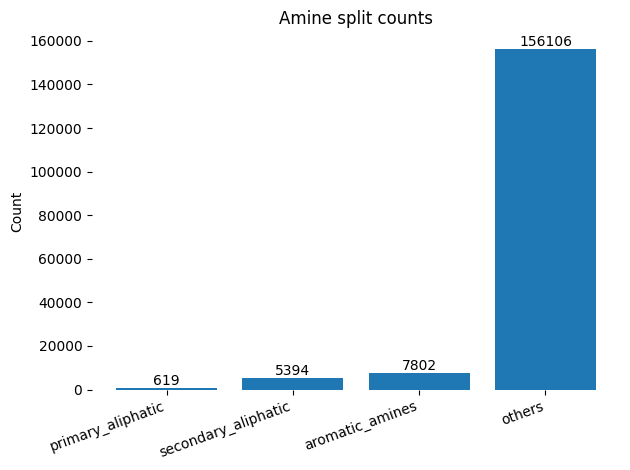

In [126]:
import matplotlib.pyplot as plt

stats = {
    "primary_aliphatic": 619,
    "secondary_aliphatic": 5394,
    "aromatic_amines": 7802,
    "others": 156106,
}

labels = list(stats.keys())
values = list(stats.values())

plt.figure()
bars = plt.bar(labels, values)
plt.ylabel("Count")
plt.title("Amine split counts")

for b in bars:
    h = b.get_height()
    plt.text(
        b.get_x() + b.get_width() / 2,
        h,
        f"{int(h)}",
        ha="center",
        va="bottom",
    )

plt.xticks(rotation=20, ha="right")
plt.box(False)
plt.tight_layout()
plt.show()

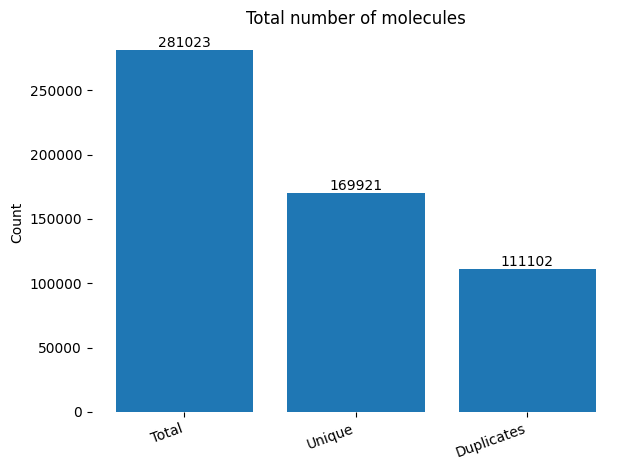

In [127]:
import matplotlib.pyplot as plt

stats = {
    "Total": 281023,
    "Unique": 169921,
    "Duplicates": 111102,
}

labels = list(stats.keys())
values = list(stats.values())

plt.figure()
bars = plt.bar(labels, values)
plt.ylabel("Count")
plt.title("Total number of molecules")

for b in bars:
    h = b.get_height()
    plt.text(
        b.get_x() + b.get_width() / 2,
        h,
        f"{int(h)}",
        ha="center",
        va="bottom",
    )

plt.xticks(rotation=20, ha="right")
plt.box(False)
plt.tight_layout()
plt.show()